In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential


In [ ]:
df = pd.read_csv('output69.csv')

In [ ]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,4.3,4.4,4.3,4.3,4.3,4.3,4.3,4.3,4.3,4.3,...,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.7,3.6
1,5.6,5.6,5.6,5.5,5.5,5.5,5.5,5.5,5.5,5.5,...,4.8,4.7,4.7,4.7,4.7,4.7,4.7,4.7,4.7,4.6
2,3.6,3.6,3.6,3.6,3.6,3.5,3.6,3.5,3.5,3.5,...,5.3,5.2,5.3,5.3,5.2,5.2,5.2,5.2,5.2,5.2
3,4.6,4.7,4.6,4.6,4.6,4.6,4.6,4.6,4.6,4.6,...,6.3,6.3,6.4,6.3,6.3,6.3,6.3,6.3,6.3,6.3
4,5.2,5.2,5.2,5.1,5.2,5.2,5.2,5.3,5.3,5.2,...,4.0,4.0,4.0,3.9,4.0,3.9,3.9,3.9,3.9,3.9


In [ ]:
missing_values_count = df.isna().sum().sum()
print(f"Number of missing values: {missing_values_count}")

Number of missing values: 2558


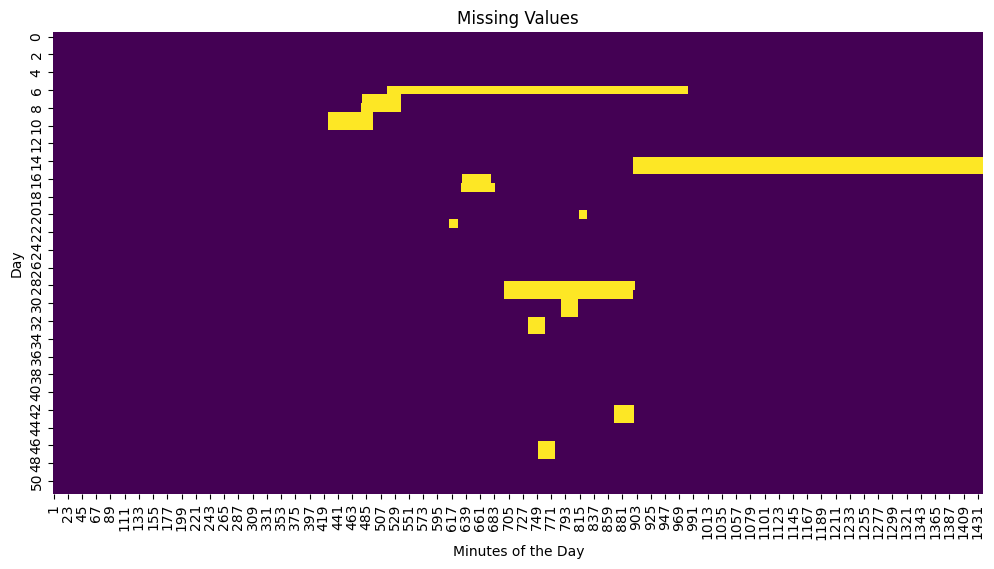

In [ ]:
# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.xlabel('Minutes of the Day')
plt.ylabel('Day')
plt.show()

In [ ]:
# Fill missing values using Autoencoders
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
scaler = MinMaxScaler()

In [ ]:
# Preprocess the data
df_processed = imputer.fit_transform(df)
df_processed = scaler.fit_transform(df_processed)

In [ ]:
autoencoder = Sequential([
    Dense(128, activation='relu', input_shape=(df.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(df.shape[1])
])

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               184320    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 16)                144       
                                                                 
 dense_6 (Dense)             (None, 32)                5

In [ ]:
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
autoencoder.fit(df_processed, df_processed, epochs=50, batch_size=32, verbose=0)

In [ ]:
# Fill missing values using Autoencoder predictions
df_filled = autoencoder.predict(df_processed)
df_filled = scaler.inverse_transform(df_filled)

2/2 [==============================] - 0s 7ms/step


In [ ]:
df_filled = pd.DataFrame(df_filled, columns=df.columns)

In [ ]:
df_filled.head()

,1,2,3,4,5,6,7,8,9,10,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,4.829664,4.852074,4.778903,4.811067,4.822914,4.827871,4.757154,4.839792,4.792743,4.835078,...,4.691646,4.581761,4.484395,4.494565,4.535491,4.596320,4.461110,4.527343,4.491391,4.477520
1,5.851275,5.798868,5.773194,5.878486,5.848858,5.870708,5.810806,5.946065,5.735141,5.942822,...,5.529438,5.355157,5.378219,5.327433,5.326568,5.524255,5.341548,5.398660,5.333583,5.340702
2,4.010613,4.118766,4.160912,4.065660,4.118642,4.217320,4.191552,4.052668,4.050985,4.172596,...,4.579174,4.456484,4.670259,4.521326,4.440215,4.667613,4.645170,4.465408,4.498164,4.545609
3,5.302347,5.178119,5.122588,5.173961,5.160004,5.037381,5.025015,5.131182,5.163784,5.095305,...,5.479149,5.430376,5.458662,5.505672,5.589058,5.463731,5.399947,5.460824,5.408671,5.458259
4,5.367334,5.235626,5.179230,5.233336,5.214528,5.084423,5.076391,5.191879,5.225429,5.147304,...,5.537093,5.487885,5.513448,5.573380,5.658772,5.511497,5.450446,5.522408,5.464437,5.516825


In [ ]:
missing_values_count = df_filled.isna().sum().sum()
print(f"Number of missing values: {missing_values_count}")

Number of missing values: 0


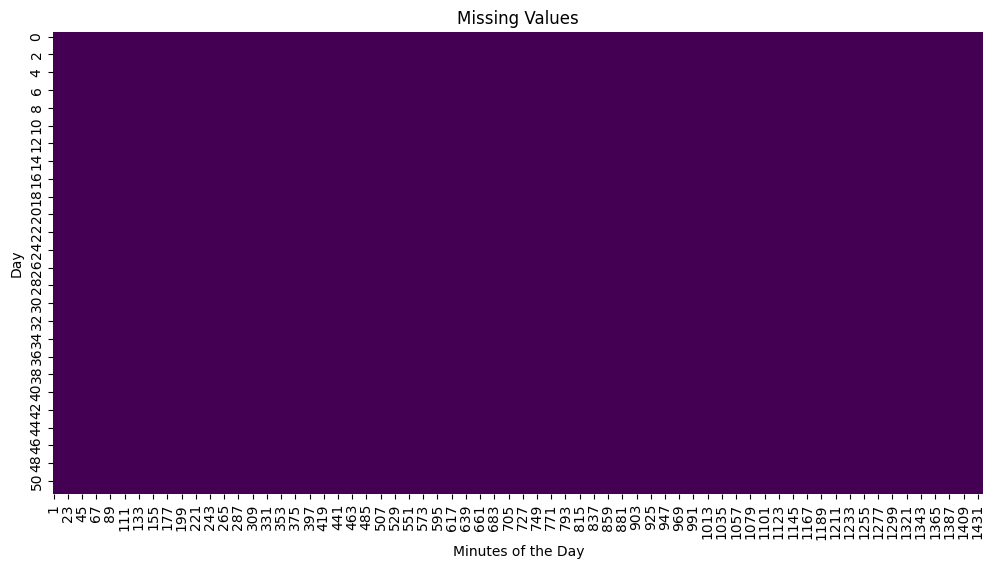

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_filled.isna(), cmap='viridis', cbar=False)
plt.title('Missing Values')
plt.xlabel('Minutes of the Day')
plt.ylabel('Day')
plt.show()

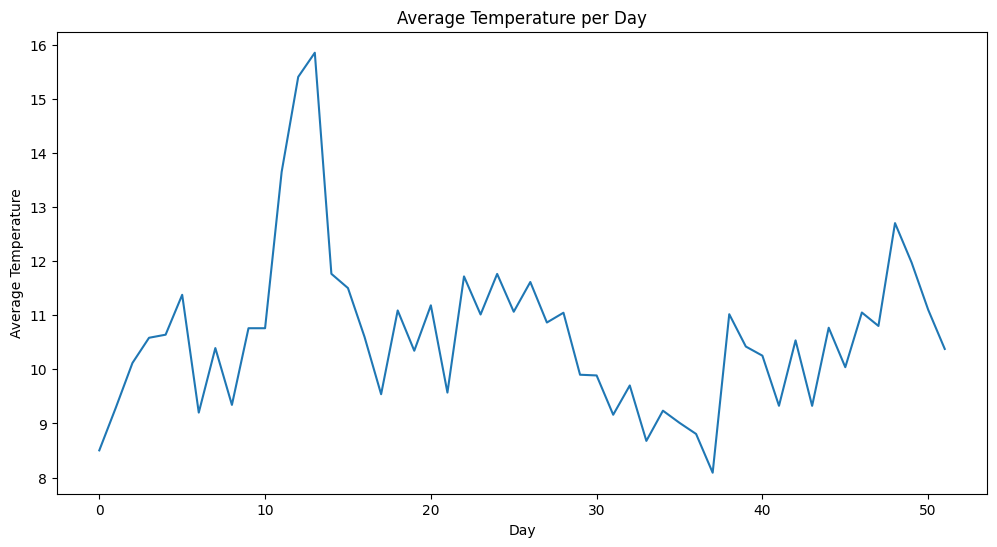

In [ ]:
plt.figure(figsize=(12, 6))
df_filled.mean(axis=1).plot()
plt.title('Average Temperature per Day')
plt.xlabel('Day')
plt.ylabel('Average Temperature')
plt.show()

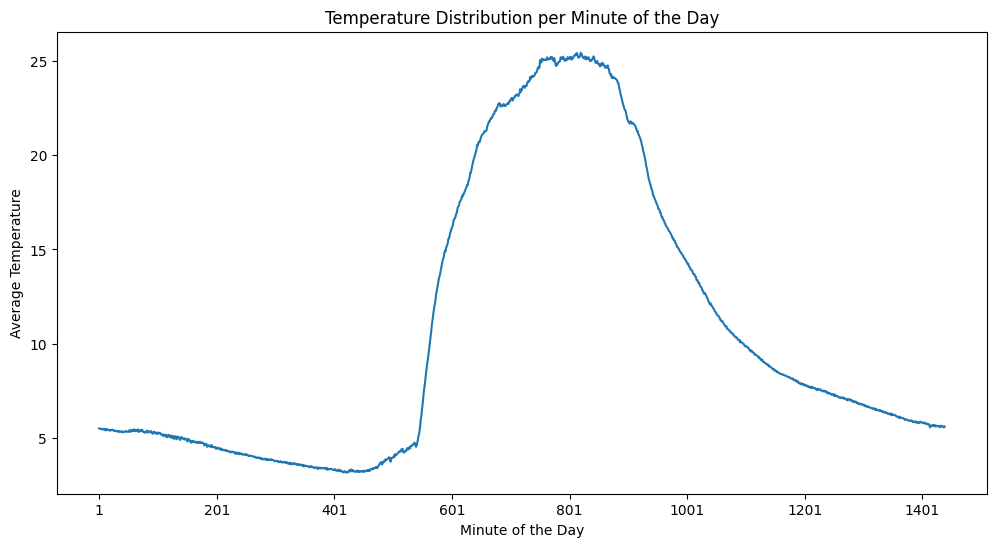

In [ ]:
plt.figure(figsize=(12, 6))
df_filled.mean(axis=0).plot()
plt.title('Temperature Distribution per Minute of the Day')
plt.xlabel('Minute of the Day')
plt.ylabel('Average Temperature')
plt.show()

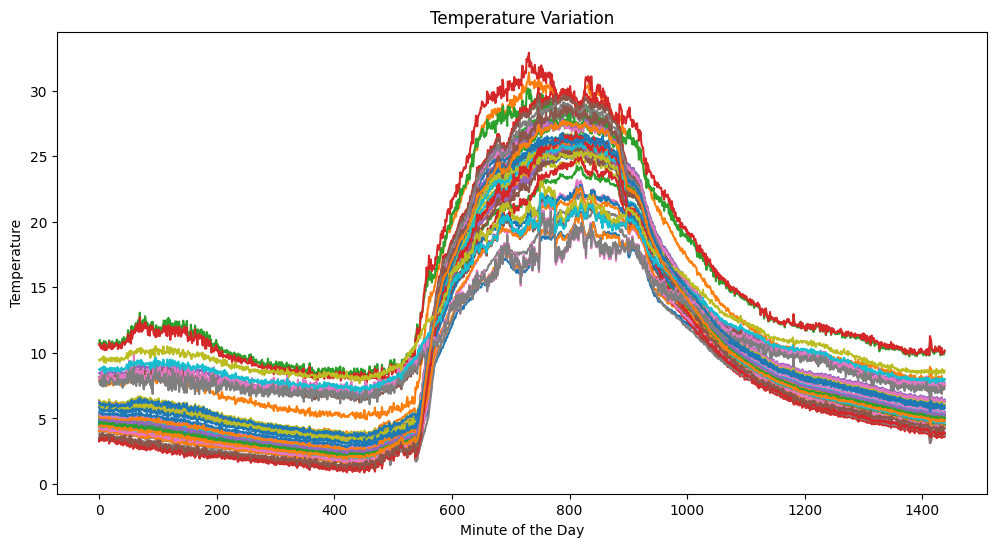

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_filled.values.T)
plt.title('Temperature Variation')
plt.xlabel('Minute of the Day')
plt.ylabel('Temperature')
plt.show()

In [ ]:
# Save the final completed dataset
df_filled.to_csv('completed_temperature_data_autoencoder.csv', index=False)


In [ ]:

from google.colab import files
files.download('completed_temperature_data_autoencoder.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

autoencoder.save_weights('autoencoder_weights.h5')

In [ ]:
import os

current_dir = os.getcwd()
weights_path = os.path.join(current_dir, 'autoencoder_weights.h5')
autoencoder.save_weights(weights_path)